In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:

# Charger les fichiers CSV avec le séparateur de point-virgule
df_customers = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/customers.csv", sep=';')
df_products = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/products.csv", sep=';')
df_transactions = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/Transactions.csv", sep=';')

In [14]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [15]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [16]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [18]:
# Assuming the DataFrames are already loaded as df_customers, df_products, and df_transactions

# Merge DataFrames
df_merged = pd.merge(df_transactions, df_customers, on='client_id')
df_merged = pd.merge(df_merged, df_products, left_on='id_prod', right_on='id_prod')



In [21]:
# En supposant que df_merged est votre DataFrame contenant la colonne 'date'
# Convertir la colonne 'date' en type datetime, en forcant les erreurs
df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')

# Supprimer les lignes avec des valeurs NaT (si nécessaire)
df_merged = df_merged.dropna(subset=['date'])


# Visualisation du nombre de transactions par mois

C:\Users\brahim\AppData\Local\Temp\ipykernel_19936\3559042016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_per_month.index, y=transactions_per_month.values, palette='viridis')


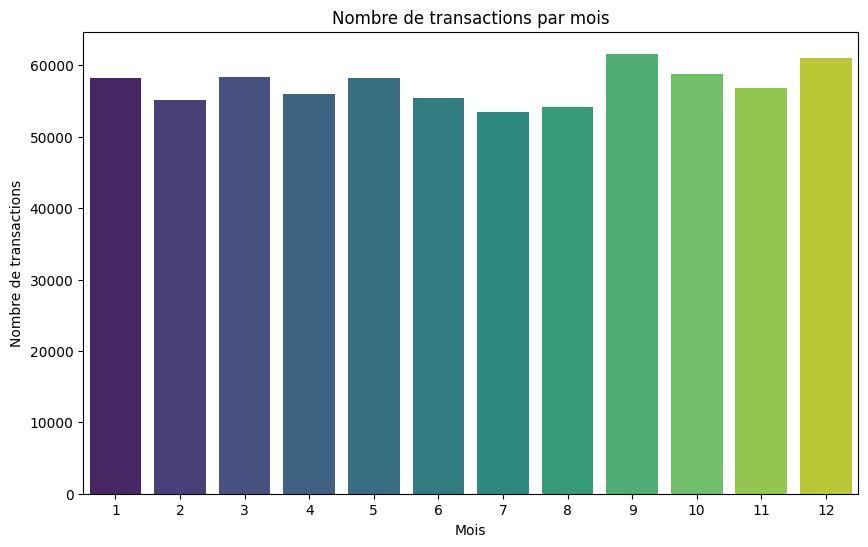

In [22]:
# Créer une colonne 'month' contenant le mois de chaque transaction
df_merged['month'] = df_merged['date'].dt.month

# Calculer le nombre de transactions par mois
transactions_per_month = df_merged.groupby('month').size()

# Tracer le nombre de transactions par mois
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_per_month.index, y=transactions_per_month.values, palette='viridis')
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions par mois')
plt.show()

# Visualisation de la répartition des ventes par catégorie de produits

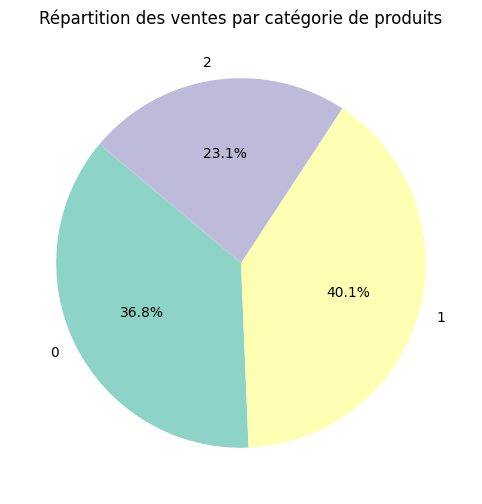

In [23]:
# Calculer les ventes totales par catégorie de produits
sales_per_category = df_merged.groupby('categ')['price'].sum()

# Tracer la répartition des ventes par catégorie
plt.figure(figsize=(8, 6))
sales_per_category.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Répartition des ventes par catégorie de produits')
plt.ylabel('')
plt.show()

# Analyse de la rentabilité des produits

C:\Users\brahim\AppData\Local\Temp\ipykernel_19936\375056228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_per_category.index, y=profit_per_category.values, palette='Pastel1')


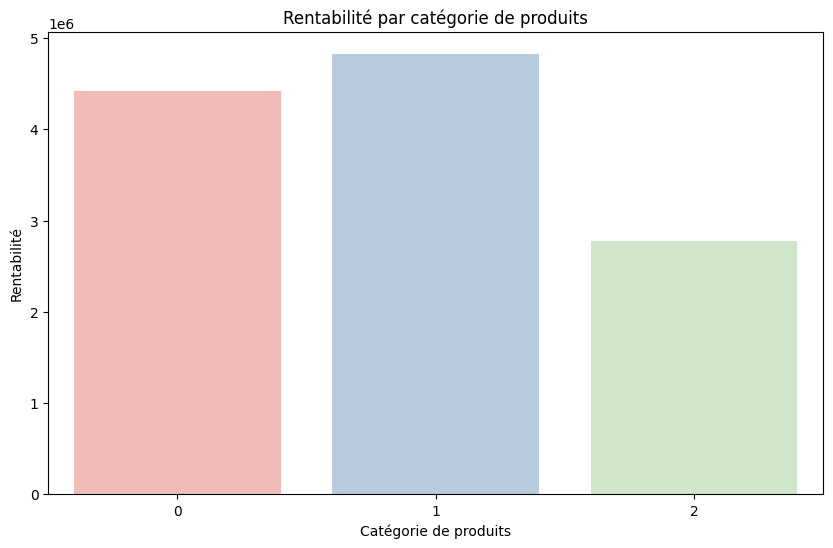

In [24]:
# Calculer la rentabilité par catégorie de produits
profit_per_category = df_merged.groupby('categ')['price'].sum() - df_merged.groupby('categ')['price'].mean()

# Tracer la rentabilité par catégorie
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_per_category.index, y=profit_per_category.values, palette='Pastel1')
plt.xlabel('Catégorie de produits')
plt.ylabel('Rentabilité')
plt.title('Rentabilité par catégorie de produits')
plt.show()

# Visualisation de la distribution des prix des produits

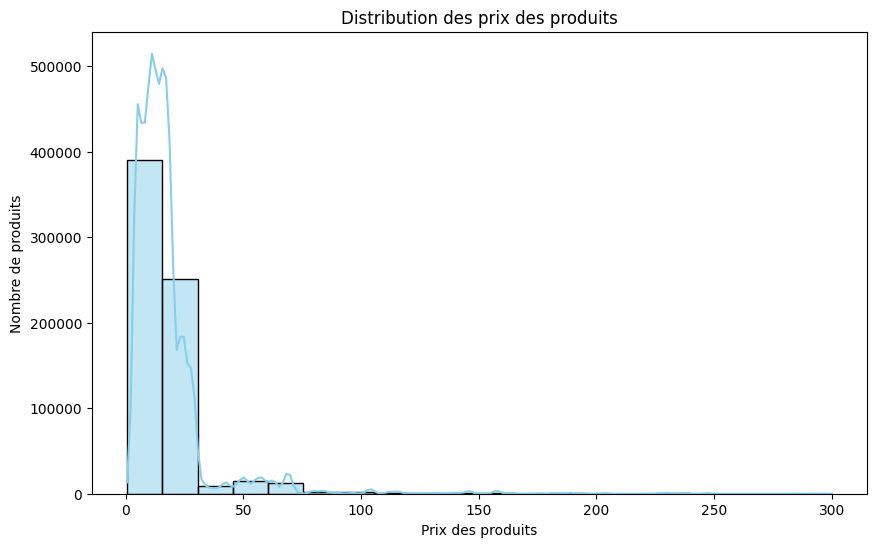

In [25]:
#la distribution des prix des produits
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['price'], bins=20, kde=True, color='skyblue')
plt.xlabel('Prix des produits')
plt.ylabel('Nombre de produits')
plt.title('Distribution des prix des produits')
plt.show()